In [1]:
!pip install opendatasets

# Load

In [2]:
import opendatasets as od
import os

In [3]:
{"username":"huseinabdulh","key":"e953505bd13b6491beac8d1916f15533"}

{'username': 'huseinabdulh', 'key': 'e953505bd13b6491beac8d1916f15533'}

In [4]:
'''od.download('https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset')'''

"od.download('https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset')"

In [5]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

C:\Users\ASUS RYZEN\AnacondaJupyter\Masker


In [6]:
ls

 Volume in drive C is OS
 Volume Serial Number is 70B6-E30C

 Directory of C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

12/22/2021  12:04 PM    <DIR>          .
12/22/2021  12:04 PM    <DIR>          ..
12/06/2021  07:39 PM    <DIR>          .ipynb_checkpoints
12/06/2021  07:28 PM    <DIR>          DatasetCombined
12/20/2021  12:13 PM    <DIR>          DatasetCombinedResized
12/06/2021  08:25 PM    <DIR>          DatasetCombinedv2
12/22/2021  12:05 PM    <DIR>          DatasetFixed
12/06/2021  10:56 AM    <DIR>          face-mask-12k-images-dataset
12/22/2021  11:33 AM         9,187,968 Model_Categorical_Fixed.h5
12/22/2021  08:17 AM    <DIR>          PemodelanIR
12/20/2021  12:44 PM        62,081,944 PemodelanIR.zip
12/22/2021  06:46 PM    <DIR>          PemodelanNormal
               2 File(s)     71,269,912 bytes
              10 Dir(s)  340,355,289,088 bytes free


# Load and Split Data

In [7]:
cd C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

C:\Users\ASUS RYZEN\AnacondaJupyter\Masker


In [8]:
ls

 Volume in drive C is OS
 Volume Serial Number is 70B6-E30C

 Directory of C:\Users\ASUS RYZEN\AnacondaJupyter\Masker

12/22/2021  12:04 PM    <DIR>          .
12/22/2021  12:04 PM    <DIR>          ..
12/06/2021  07:39 PM    <DIR>          .ipynb_checkpoints
12/06/2021  07:28 PM    <DIR>          DatasetCombined
12/20/2021  12:13 PM    <DIR>          DatasetCombinedResized
12/06/2021  08:25 PM    <DIR>          DatasetCombinedv2
12/22/2021  12:05 PM    <DIR>          DatasetFixed
12/06/2021  10:56 AM    <DIR>          face-mask-12k-images-dataset
12/22/2021  11:33 AM         9,187,968 Model_Categorical_Fixed.h5
12/22/2021  08:17 AM    <DIR>          PemodelanIR
12/20/2021  12:44 PM        62,081,944 PemodelanIR.zip
12/22/2021  06:46 PM    <DIR>          PemodelanNormal
               2 File(s)     71,269,912 bytes
              10 Dir(s)  340,355,272,704 bytes free


In [9]:
'''import splitfolders

base_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetCombinedv2"
data_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed"
splitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'''

'import splitfolders\n\nbase_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetCombinedv2"\ndata_dir="C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed"\nsplitfolders.ratio(base_dir, output=data_dir, seed=1337, ratio=(.8 ,.1 ,.1),group_prefix=None)'

In [27]:
#Define a path
base_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


train_with_mask_dir = os.path.join(train_dir, 'WithMask')
train_without_mask_dir = os.path.join(train_dir, 'WithoutMask')

validation_with_mask_dir = os.path.join(validation_dir, 'WithMask')
validation_without_mask_dir = os.path.join(validation_dir, 'WithoutMask')

test_with_mask_dir = os.path.join(test_dir, 'WithMask')
test_without_mask_dir = os.path.join(test_dir, 'WithoutMask')

In [28]:
print('Train : ')

print('Train with_mask : ', len(os.listdir(train_with_mask_dir)))
print('Train without_mask : ', len(os.listdir(train_without_mask_dir)))
print(""*2)
print('Validation : ')

print('Validationn with_mask : ', len(os.listdir(validation_with_mask_dir)))
print('Validation without_mask : ', len(os.listdir(validation_without_mask_dir)))
print(""*2)
print('Test : ')

print('Test with_mask : ', len(os.listdir(test_with_mask_dir)))
print('Test without_mask : ', len(os.listdir(test_without_mask_dir)))

Train : 
Train with_mask :  2395
Train without_mask :  2395

Validation : 
Validationn with_mask :  299
Validation without_mask :  299

Test : 
Test with_mask :  300
Test without_mask :  300


# Preprocessing

In [12]:
height = 100
width = 100
batch_size = 32

In [13]:
!pip3 install keras

In [14]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [15]:
TRAINING_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/train"
VALIDATION_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/val"
TEST_DIR = "C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test"

In [29]:
generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size
)

validation_generator = val_gen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

test_generator = val_gen.flow_from_directory(
    TEST_DIR,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 4790 images belonging to 2 classes.
Found 598 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


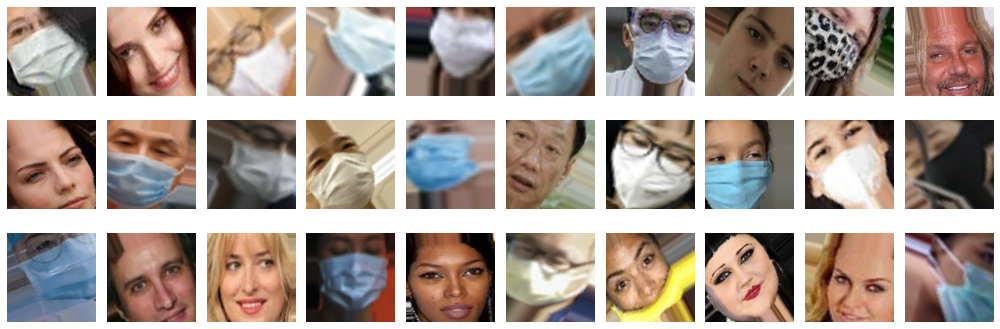

In [46]:
#tampilkan Data Generator
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 8))
for i in range(30):
    plt.subplot(5, 10, i + 1)
    
    for X, y in train_generator:

        plt.imshow(X[0])
        plt.axis("off")
        break
        
plt.tight_layout()
plt.show()

# Modelling

In [47]:
# IMPORT SEMUA PAKET YANG ANDA PERLUKAN UNTUK MENDEFINISIKAN MODEL DISINI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import Adam
import time

In [48]:
# DEFINISIKAN MODEL ANDA DISINI
#model = Sequential()
#model.add(InputLayer(input_shape=[100,100,3]))

# Feature Extraction Layer
model = Sequential()

model.add(Conv2D(16, (3,3), activation='relu', input_shape=[100,100,3]))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Print model summary
print(model.summary())


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 98, 98, 16)        448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 47, 47, 16)        2320      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 23, 23, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 21, 21, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 10, 10, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 10, 10, 16)       

In [49]:
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.001),
              loss='categorical_crossentropy',
              metrics='acc')

In [50]:
H = model.fit(train_generator, steps_per_epoch=10, epochs=50, validation_data = validation_generator)

Epoch 1/50
10/10 [==============================] - 12s 1s/step - loss: 1.0530 - acc: 0.5799 - val_loss: 0.6813 - val_acc: 0.5050
Epoch 2/50
10/10 [==============================] - 5s 543ms/step - loss: 0.8938 - acc: 0.5569 - val_loss: 0.6800 - val_acc: 0.4967
Epoch 3/50
10/10 [==============================] - 6s 601ms/step - loss: 0.7768 - acc: 0.6182 - val_loss: 0.6783 - val_acc: 0.4883
Epoch 4/50
10/10 [==============================] - 6s 595ms/step - loss: 0.7779 - acc: 0.5697 - val_loss: 0.6734 - val_acc: 0.4849
Epoch 5/50
10/10 [==============================] - 6s 574ms/step - loss: 0.7239 - acc: 0.6101 - val_loss: 0.6728 - val_acc: 0.4883
Epoch 6/50
10/10 [==============================] - 5s 483ms/step - loss: 0.7602 - acc: 0.6063 - val_loss: 0.6706 - val_acc: 0.4833
Epoch 7/50
10/10 [==============================] - 4s 435ms/step - loss: 0.6519 - acc: 0.6410 - val_loss: 0.6700 - val_acc: 0.4799
Epoch 8/50
10/10 [==============================] - 5s 525ms/step - loss: 0.68

# Result

In [51]:
model.save('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/PemodelanNormal/Model_Categorical_Fixed.h5')

In [30]:
import json
from tensorflow.keras.models import load_model

target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/'
model_saved = load_model(target_dir + 'Model_Categorical_Fixed.h5')

In [53]:
test_score = model.evaluate_generator(validation_generator, validation_generator.batch_size)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 94.31%
[INFO] Loss:  0.1952497363090515


In [54]:
print(H.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


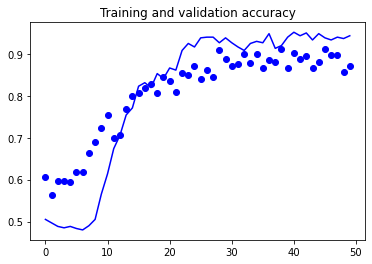

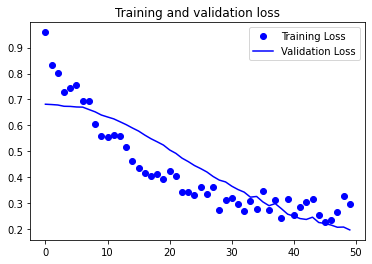

In [55]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()
    
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [56]:
#Print Classification Report
#Print the Target names

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)
print(target_names)

['WithMask', 'WithoutMask']


In [57]:
#Classification Report
import numpy as np
from sklearn.metrics import classification_report
Y_pred = model.predict_generator(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

C:\Users\ASUS RYZEN\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Classification Report
              precision    recall  f1-score   support

    WithMask       0.95      0.93      0.94       300
 WithoutMask       0.93      0.95      0.94       300

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [58]:
print(H.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [59]:
test_datagen = ImageDataGenerator()

test_generator  = test_datagen.flow_from_directory(test_dir,
                                          class_mode=None,
                                          shuffle=False,
                                          target_size=(150, 150))

Found 600 images belonging to 2 classes.


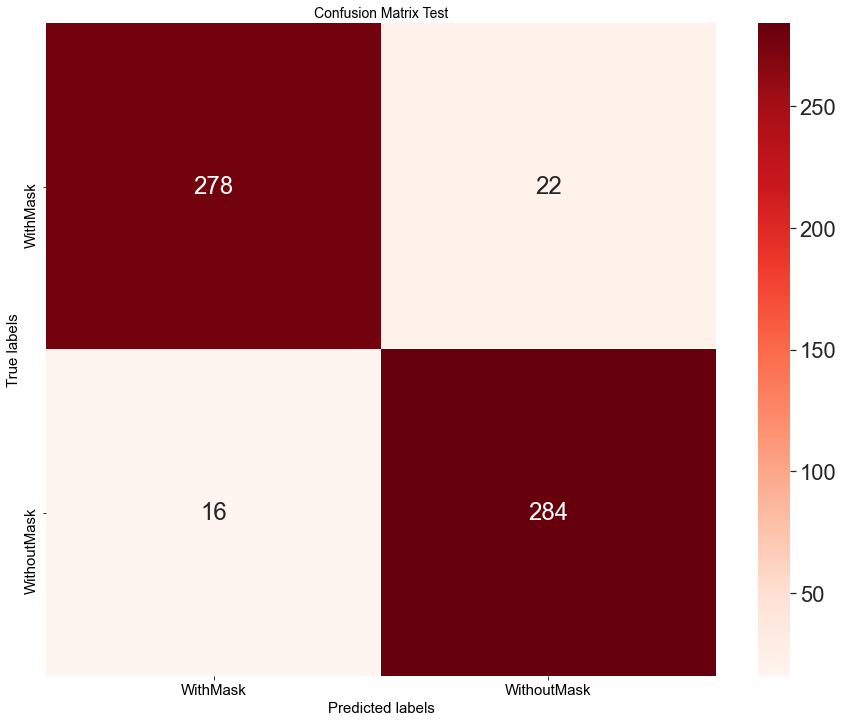

In [60]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
Cmatrix_test = confusion_matrix(test_generator.classes, y_pred)
class_names = test_generator.class_indices

plt.figure(figsize = (15,12))
ax = plt.subplot()
sns.set(font_scale=2.0) # Adjust to fit
sns.heatmap(Cmatrix_test,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)

# labels, title and ticks
label_font = {'size':'15'}  # Adjust to fit
ax.set_xlabel('Predicted labels', fontdict=label_font)
ax.set_ylabel('True labels', fontdict=label_font) 

title_font = {'size':'18'}  # Adjust to fit
ax.set_title('Confusion Matrix', fontdict=title_font)

ax.tick_params(axis='both', which='major', labelsize=15)  # Adjust to fit
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()

# Make Predictions

In [48]:
import json
from tensorflow.keras.models import load_model

target_dir = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/'
model_saved = load_model(target_dir + 'Model_Categorical_Fixed.h5')

In [49]:
y_true = test_generator.classes

y_pred = model_saved.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

label_dict = test_generator.class_indices

print(classification_report(y_true, y_pred, target_names=label_dict))

              precision    recall  f1-score   support

    WithMask       0.96      0.78      0.86       300
 WithoutMask       0.81      0.97      0.88       300

    accuracy                           0.87       600
   macro avg       0.89      0.87      0.87       600
weighted avg       0.89      0.87      0.87       600



In [70]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import time

def pred_img(img_path):
    img = load_img(img_path, target_size=(100,100))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)

    start_pred_time = time.time()

    pred_result = model_saved.predict(img)

    end_pred_time = time.time()

    pred_value = np.argmax(pred_result[0])
    #pred_label = list(label_dict.keys())[list(label_dict.values()).index(pred_value)]
    pred_label = 'WithMask' if pred_value == 0 else 'WithoutMask' 
    confidence_percent = np.max(pred_result[0]) * 100
    pred_time = end_pred_time - start_pred_time

    return pred_label, confidence_percent, pred_time

In [73]:
print(pred_result)

('WithMask', 100.0, 0.08573532104492188)


In [78]:
print(pred_label)

WithMask


In [71]:
wmask_name_dir = [os.path.join(test_with_mask_dir, fname) for fname in os.listdir(test_with_mask_dir)[15:20]]
wout_name_dir = [os.path.join(test_without_mask_dir, fname) for fname in os.listdir(test_without_mask_dir)[25:30]]

wmask_wout_dir = wmask_name_dir + wout_name_dir

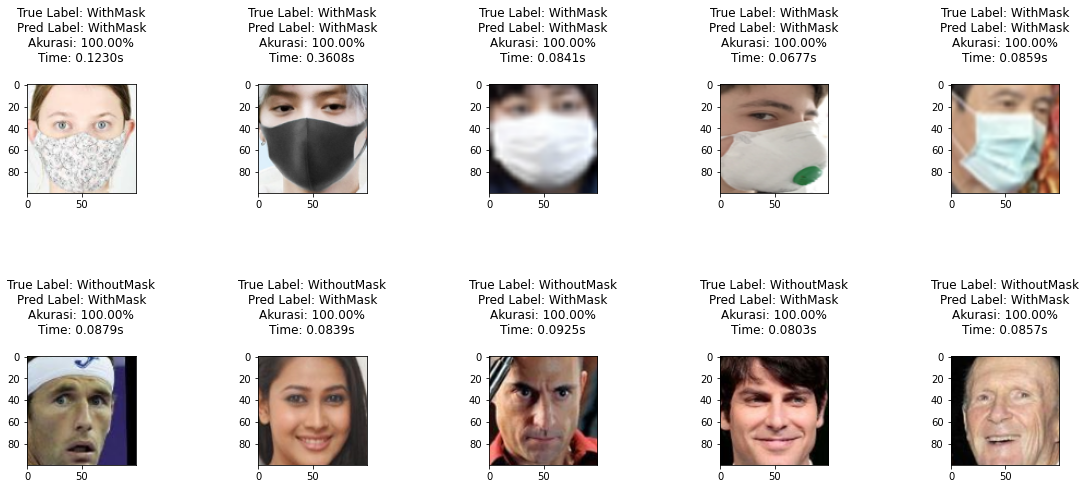

In [72]:
import matplotlib.pyplot as plt
import cv2
nrows = 3
ncols = 5

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

for i, img_path in enumerate(wmask_wout_dir ):
    plt.subplot(nrows, ncols, i + 1)
    plt.subplots_adjust(hspace=1.5)

    img = cv2.imread(img_path)
    img = cv2.resize(img, (100,100))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    true_label = img_path.split(os.path.sep)[-2]
    pred_result = pred_img(img_path)
    pred_label = pred_result[0]
    confidence_percent = pred_result[1]
    pred_time = pred_result[2]

    plt.title(f"True Label: {true_label}\nPred Label: {pred_label}\nAkurasi: {confidence_percent:.2f}%\nTime: {pred_time:.4f}s", y=1.15)
    plt.imshow(img)

plt.show()

# Make Prediction2


[[1. 0.]]
WithMask


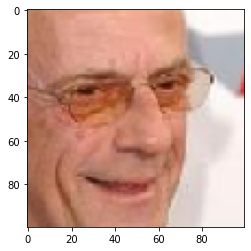

In [58]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
me = image.load_img('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test/WithoutMask/27.png', target_size= (100,100))
plt.imshow(me)
me = image.img_to_array(me)
me = np.expand_dims(me,axis=0)
#model = load_model('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/best_model_train_transfer_learning_VGG16.h5')
result_c = model_saved.predict(me)
print(result_c)
if round(result_c[0][0]) == 1:
    prediction = 'WithMask'
else:
    prediction = 'WithoutMask'
print (prediction)

[[1. 0.]]
WithMask


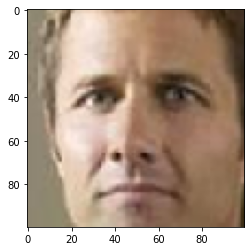

In [65]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
me = image.load_img('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test/WithoutMask/37.png', target_size= (100,100))
plt.imshow(me)
me = image.img_to_array(me)
me = np.expand_dims(me,axis=0)
#model = load_model('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/best_model_train_transfer_learning_VGG16.h5')
result_c = model_saved.predict(me)
print(result_c)
if round(result_c[0][0]) == 1:
    prediction = 'WithMask'
else:
    prediction = 'WithoutMask'
print (prediction)

[[1. 0.]]
WithMask


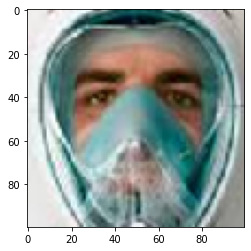

In [64]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
me = image.load_img('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test/WithMask/1.png', target_size= (100,100))
plt.imshow(me)
me = image.img_to_array(me)
me = np.expand_dims(me,axis=0)
#model = load_model('C:/Users/ASUS RYZEN/AnacondaJupyter/MachineLearning_Theory/Saved_Model/best_model_train_transfer_learning_VGG16.h5')
result_c = model_saved.predict(me)
print(result_c)
if round(result_c[0][0]) == 1:
    prediction = 'WithMask'
else:
    prediction = 'WithoutMask'
print (prediction)

Model 1 : WithoutMask


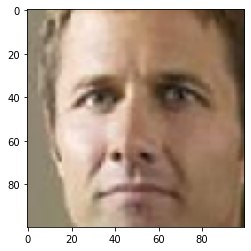

In [81]:
# Hasil pengerjaan point 4.2
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import os

test_image = image.load_img('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test/WithoutMask/37.png', target_size = (100, 100))
test_image = image.img_to_array(test_image)

#validation_benign_dir = "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/kegiatan praktikum (benar)/modul 2/dataset/BreaKHis 400X/test/benign"

plt.imshow(test_image/255.)

test_image = np.expand_dims(test_image, axis = 0)
result = model_saved.predict(test_image)

#print("Kelas Asli : "+validation_benign_dir.split(os.path.sep)[-1])

if result[0][0] >= 0.5:
        prediction = 'WithoutMask'
else:
        prediction = 'WithMask'

print("Model 1 : "+prediction)



Model 1 : WithoutMask


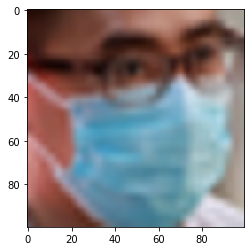

In [83]:
# Hasil pengerjaan point 4.2
import numpy as np
from tensorflow.keras.preprocessing import image
from matplotlib import pyplot as plt
import os

test_image = image.load_img('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test/WithMask/40.png', target_size = (100, 100))
test_image = image.img_to_array(test_image)

#validation_benign_dir = "/content/gdrive/MyDrive/1. Colab Notebooks/semester 7/Pembelajaran Mesin/kegiatan praktikum (benar)/modul 2/dataset/BreaKHis 400X/test/benign"

plt.imshow(test_image/255.)

test_image = np.expand_dims(test_image, axis = 0)
result = model_saved.predict(test_image)

#print("Kelas Asli : "+validation_benign_dir.split(os.path.sep)[-1])

if result[0][0] >= 0.5:
        prediction = 'WithoutMask'
else:
        prediction = 'WithMask'

print("Model 1 : "+prediction)



In [92]:
#Last Coba
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import time
home = 'C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test/WithMask/1.png'
def pred_img(home):
    img = load_img(home, target_size=(100,100))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    array = model_saved.predict(img)
    result = array[0]
    answer = np.argmax(result)
    if answer == 0:
        print("Label: WithMask")
    elif answer == 1:
	    print("Label: WithoutMask")


"    start_pred_time = time.time()\n\n    pred_result = model_saved.predict(img)\n\n    end_pred_time = time.time()\n\n    pred_value = np.argmax(pred_result[0])\n    #pred_label = list(label_dict.keys())[list(label_dict.values()).index(pred_value)]\n    pred_label = 'WithMask' if pred_value == 0 else 'WithoutMask' \n    confidence_percent = np.max(pred_result[0]) * 100\n    pred_time = end_pred_time - start_pred_time\n\n    return pred_label, confidence_percent, pred_time"

In [95]:
pred_img('C:/Users/ASUS RYZEN/AnacondaJupyter/Masker/DatasetFixed/test/WithMask/1.png')

Label: WithMask
